# Lineup Visualization on a Football Field

## Objective
This notebook visualizes the selected fantasy football lineup on a designated football field layout, illustrating player positions based on the chosen formation.

   chance_of_playing_next_round  chance_of_playing_this_round    code  \
0                           NaN                           NaN  121160   
1                         100.0                          75.0  159506   
2                           NaN                           NaN  178186   
3                         100.0                         100.0  101668   

   cost_change_event  cost_change_event_fall  cost_change_start  \
0                  0                       0                  0   
1                 -1                       1                 -1   
2                  0                       0                  0   
3                  0                       0                  1   

   cost_change_start_fall  dreamteam_count  element_type  ep_next  ...  \
0                       0                0             1      6.0  ...   
1                       1                1             2      5.0  ...   
2                       0                0             3      4.0  ...   
3 

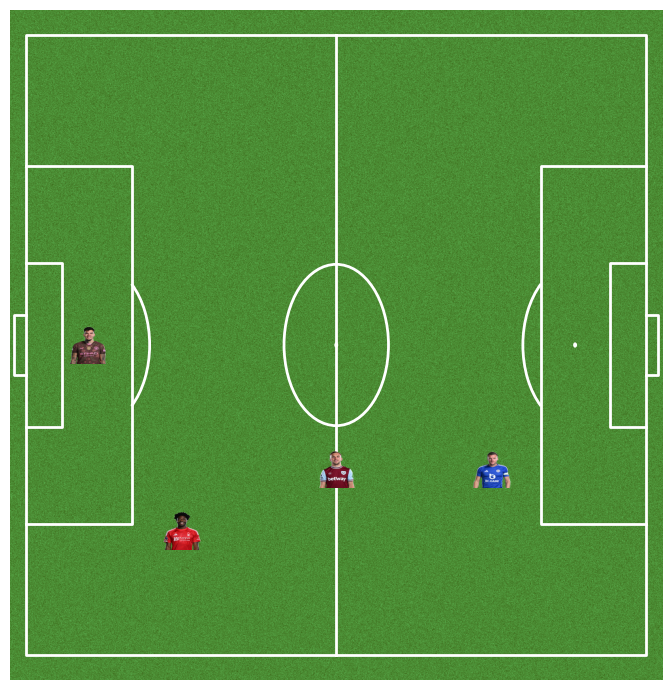

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO
from mplsoccer import Pitch

# Load the processed lineup data from EDA results
lineup_df = pd.read_csv('../data/processed/top_players_lineup.csv')

# Print the lineup data to understand the position column values
print(lineup_df.head())  # Check the positions to understand how to map them

# Base URL for player photos
photo_base_url = "https://resources.premierleague.com/premierleague/photos/players/110x140/p"

# Function to fetch player images
def fetch_player_image(photo_filename):
    photo_id = photo_filename.split('.')[0]  # Remove any .jpg extension if present
    url = f"{photo_base_url}{photo_id}.png"
    try:
        response = requests.get(url)
        response.raise_for_status()  # Ensure the request was successful
        img = Image.open(BytesIO(response.content))
        return img
    except Exception as e:
        print(f"Could not load image for {photo_filename}: {e}")
        return None

# Define position coordinates based on the actual positions found in lineup_df
# Adjust based on formation (e.g., 4-3-3, 4-4-2)
position_coords = {
    '1': (10, 50),  # Goalkeeper
    '2': [(25, 20), (25, 40), (25, 60), (25, 80)],  # Defenders (up to 4)
    '3': [(50, 30), (50, 50), (50, 70)],  # Midfielders (up to 3)
    '4': [(75, 30), (75, 50), (75, 70)]  # Forwards (up to 3)
}

# Create the pitch using mplsoccer
pitch = Pitch(pitch_type='opta', pitch_color='grass', line_color='white', goal_type='box')
fig, ax = pitch.draw(figsize=(10, 7))

# Debug: Print the positions and ensure they match correctly
print("Available positions in position_coords:", position_coords.keys())
print("Positions in lineup_df:", lineup_df['position'].unique())

# Count of players in each position group
position_counts = {'1': 0, '2': 0, '3': 0, '4': 0}

# Position players on the field based on their role
for idx, player in lineup_df.iterrows():
    position = str(player['position'])  # Convert to string to match keys in position_coords
    name = player['web_name']
    photo_filename = player['photo']
    
    # Determine coordinates based on position and index within the position group
    if position in position_coords:
        coords = position_coords[position]
        if isinstance(coords, list):  # Handle multiple players in the same position group
            pos_idx = position_counts[position] % len(coords)  # Correct indexing within bounds
            x, y = coords[pos_idx]
            position_counts[position] += 1  # Increment the count for this position
        else:
            x, y = coords
    else:
        print(f"Position {position} not mapped. Using default coordinates.")
        x, y = 50, 50  # Default to center if position is not mapped

    print(f"Placing {name} at position {position} with coordinates ({x}, {y})")  # Debug output

    # Fetch and display the player image
    img = fetch_player_image(photo_filename)
    if img:
        ax.imshow(img, extent=(x-3, x+3, y-3, y+3), zorder=2)  # Adjust extent for proper placement
    else:
        ax.text(x, y, name, ha='center', va='center', fontsize=10, color='blue', zorder=3)

plt.show()


In [14]:
for idx, player in lineup_df.iterrows():
    position = str(player['position'])
    name = player['web_name']
    photo_filename = player['photo']
    goals = player['goals_scored']  # Example stat
    assists = player['assists']  # Example stat

    if position in position_coords:
        coords = position_coords[position]
        if isinstance(coords, list):
            pos_idx = position_counts[position] % len(coords)
            x, y = coords[pos_idx]
            position_counts[position] += 1
        else:
            x, y = coords

    img = fetch_player_image(photo_filename)
    if img:
        ax.imshow(img, extent=(x-3, x+3, y-3, y+3), zorder=2)
        ax.text(x, y-6, f"G: {goals} A: {assists}", ha='center', va='center', fontsize=8, color='white', zorder=3)
    else:
        ax.text(x, y, name, ha='center', va='center', fontsize=10, color='blue', zorder=3)

plt.show()
